# Life Expectancy (WHO)
#### - Statistical Analysis on factors influencing Life Expectancy -

### Brief Summary of Life Expectancy Dataset

#### Key Points:
- **Period Covered**: 2000-2015
- **Number of Countries**: 193
- **Total Rows**: 2938
- **Total Columns**: 22

#### Important Variables:
1. **Country**: Name of the country
2. **Year**: Year of the data
3. **Status**: Developed or Developing
4. **Life expectancy**: Average life expectancy in years
5. **Adult Mortality**: Probability of dying between 15 and 60 years per 1000 population
6. **Infant Deaths**: Number of infant deaths per 1000 population
7. **Alcohol**: Per capita alcohol consumption (liters)
8. **Percentage Expenditure**: Health expenditure as a percentage of GDP per capita
9. **Hepatitis B**: Immunization coverage among 1-year-olds (%)
10. **Measles**: Number of reported cases per 1000 population
11. **BMI**: Average body mass index of the population
12. **Under-five Deaths**: Number of deaths under five years per 1000 population
13. **Polio**: Immunization coverage among 1-year-olds (%)
14. **Total Expenditure**: Government health expenditure as a percentage of total government expenditure
15. **Diphtheria**: Immunization coverage among 1-year-olds (%)
16. **HIV/AIDS**: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
17. **GDP**: Gross domestic product per capita (USD)
18. **Population**: Total population
19. **Thinness 1-19 Years**: Prevalence of thinness among children and adolescents (10-19 years)
20. **Thinness 5-9 Years**: Prevalence of thinness among children (5-9 years)
21. **Income Composition of Resources**: Human Development Index related to income composition (0-1)
22. **Schooling**: Average number of years of schooling

#### Notable Data Handling:
- **Missing Data**: Mainly for population, Hepatitis B, and GDP from lesser-known countries (e.g., Vanuatu, Tonga).
- **Excluded Countries**: Countries with significant missing data were excluded from the final dataset.

#### Study Objectives:
- Determine which factors significantly affect life expectancy.
- Assess the impact of healthcare expenditure on life expectancy in countries with lower values (<65 years).
- Analyze the effects of infant and adult mortality rates, lifestyle choices, schooling, population density, and immunization coverage on life expectancy.

This dataset provides a comprehensive basis for understanding the determinants of life expectancy and supports the development of targeted health policies and interventions.

# Importing Libraries and Loading data

In [430]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [500]:
data = pd.read_csv("Life Expectancy Data 2.csv")
data = data.rename(columns=lambda x: x.strip())
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Preprocessing Column: Country

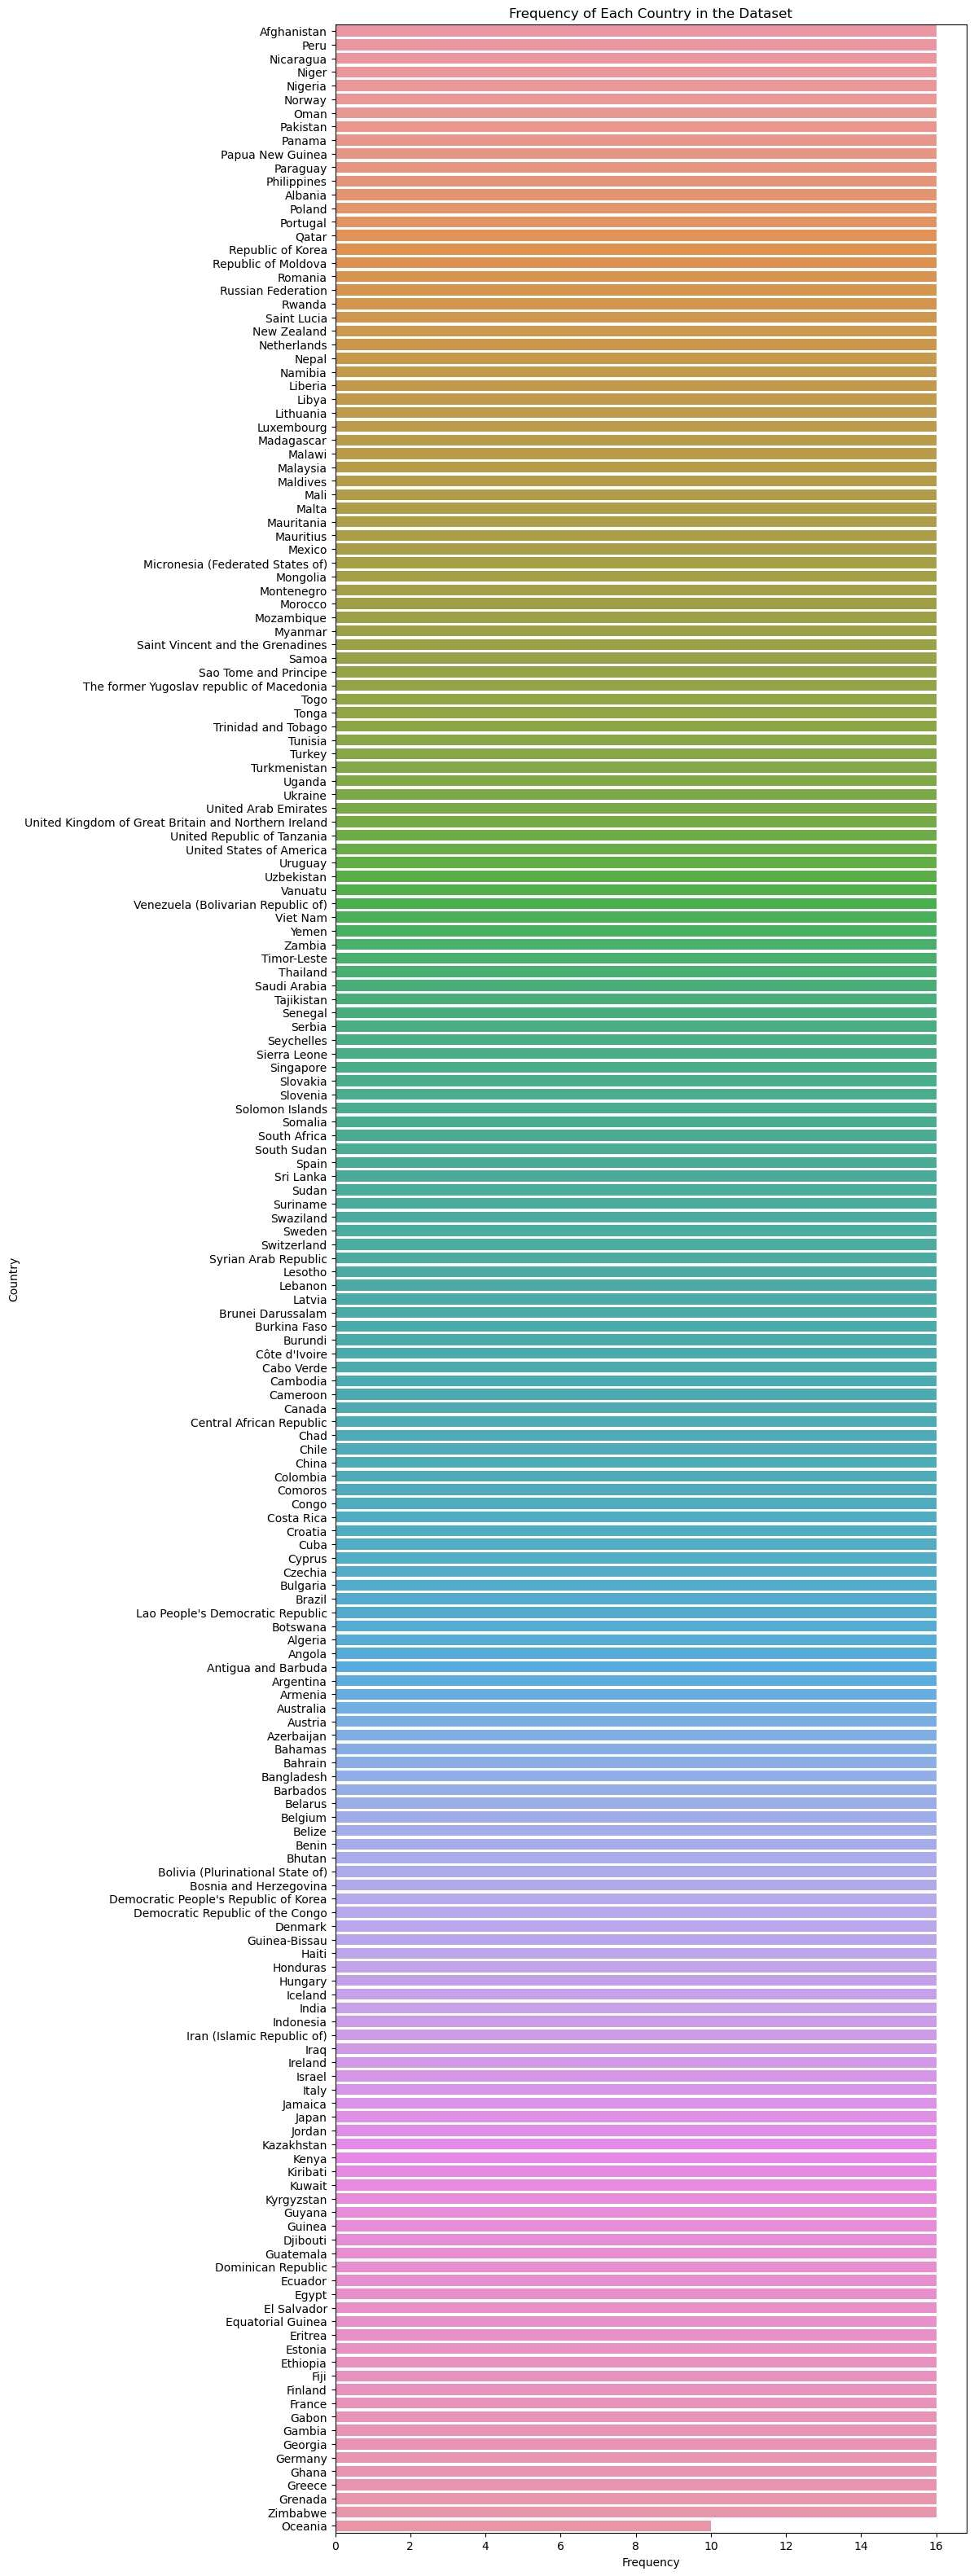

In [501]:
# List of countries to be grouped into 'Oceania'
oceania_countries = ['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu']

# Group these countries into 'Oceania'
data['Country'] = data['Country'].replace(oceania_countries, 'Oceania')

# Verify the changes
plt.figure(figsize=(10, 40))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Frequency of Each Country in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

# Preprocessing Column: Life expectancy

### Missing value treatment:

In [547]:
data['Life expectancy'] = data.groupby('Country')['Life expectancy'].transform(lambda x: x.fillna(x.mean()))

# Verify the changes
missing_values_alcohol = data['Life expectancy'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')


# Fill remaining missing values with the global mean alcohol consumption
global_mean_alcohol = data['Life expectancy'].mean()
data['Life expectancy'] = data['Life expectancy'].fillna(global_mean_alcohol)

# Verify the changes
missing_values_alcohol = data['Life expectancy'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')

Missing values in Alcohol column after filling: 10
Missing values in Alcohol column after filling: 0


### Outlier Treatment:

In [503]:
import pandas as pd
from scipy.stats import zscore

# Initialize a list to store the outliers
outliers = []

# Handle outliers on a country-by-country basis using Z-score
threshold = 3.5  # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Life expectancy'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Life expectancy']))

# Print all identified outliers
print("Identified Outliers:")
for country, idx, outlier in outliers:
    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Life expectancy'].mean()
    std_dev = country_data['Life expectancy'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Life expectancy'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Life expectancy'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Life expectancy']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")


Identified Outliers:
Country: Haiti, Index: 1127, Outlier: 36.3
Country: Libya, Index: 1521, Outlier: 78.0

After Outliers treatment:
Country: Haiti, Index: 1127, Original Outlier: 36.3, New Value: 36.88758946395802
Country: Libya, Index: 1521, Original Outlier: 78.0, New Value: 78.0


# Preprocessing Column: Adult Mortality

### Missing value treatment:

In [550]:
# Identify countries with missing values in the 'Adult Mortality' column
data['Adult Mortality'] = data.groupby('Country')['Adult Mortality'].transform(lambda x: x.fillna(x.mean()))

# Verify the changes
missing_values_alcohol = data['Adult Mortality'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')


# Fill remaining missing values with the global mean alcohol consumption
global_mean_alcohol = data['Adult Mortality'].mean()
data['Adult Mortality'] = data['Adult Mortality'].fillna(global_mean_alcohol)

# Verify the changes
missing_values_alcohol = data['Adult Mortality'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')

Missing values in Alcohol column after filling: 10
Missing values in Alcohol column after filling: 0


### Outlier treatment:

In [505]:
from scipy.stats import zscore

# Initialize a list to store the outliers
outliers = []

# Handle outliers on a country-by-country basis using Z-score
threshold = 2 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Adult Mortality'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Adult Mortality']))

# Print all identified outliers
print("Identified Outliers:")
for country, idx, outlier in outliers:
    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Adult Mortality'].mean()
    std_dev = country_data['Adult Mortality'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Adult Mortality'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Adult Mortality'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Adult Mortality']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")


Identified Outliers:
Country: Afghanistan, Index: 13, Outlier: 3.0
Country: Algeria, Index: 33, Outlier: 11.0
Country: Algeria, Index: 43, Outlier: 14.0
Country: Angola, Index: 62, Outlier: 44.0
Country: Angola, Index: 63, Outlier: 48.0
Country: Antigua and Barbuda, Index: 64, Outlier: 13.0
Country: Antigua and Barbuda, Index: 70, Outlier: 14.0
Country: Argentina, Index: 83, Outlier: 12.0
Country: Argentina, Index: 84, Outlier: 12.0
Country: Argentina, Index: 91, Outlier: 13.0
Country: Armenia, Index: 97, Outlier: 12.0
Country: Armenia, Index: 103, Outlier: 14.0
Country: Australia, Index: 113, Outlier: 6.0
Country: Austria, Index: 131, Outlier: 7.0
Country: Azerbaijan, Index: 149, Outlier: 13.0
Country: Azerbaijan, Index: 152, Outlier: 14.0
Country: Bahamas, Index: 161, Outlier: 16.0
Country: Bahamas, Index: 173, Outlier: 19.0
Country: Bahrain, Index: 177, Outlier: 7.0
Country: Bahrain, Index: 178, Outlier: 7.0
Country: Bangladesh, Index: 196, Outlier: 14.0
Country: Belarus, Index: 226

In [506]:
algeria_data = data[data['Country'] == 'Algeria']
#algeria_data = data[data["Country"] == "Algeria"]
print(algeria_data)

    Country  Year      Status  Life expectancy  Adult Mortality  \
32  Algeria  2015  Developing             75.6        19.000000   
33  Algeria  2014  Developing             75.4        12.559837   
34  Algeria  2013  Developing             75.3       112.000000   
35  Algeria  2012  Developing             75.1       113.000000   
36  Algeria  2011  Developing             74.9       116.000000   
37  Algeria  2010  Developing             74.7       119.000000   
38  Algeria  2009  Developing             74.4       123.000000   
39  Algeria  2008  Developing             74.1       126.000000   
40  Algeria  2007  Developing             73.8       129.000000   
41  Algeria  2006  Developing             73.4       132.000000   
42  Algeria  2005  Developing             72.9       136.000000   
43  Algeria  2004  Developing             72.3        14.000000   
44  Algeria  2003  Developing             71.7       146.000000   
45  Algeria  2002  Developing             71.6       145.00000

Text(0.5, 0, 'Adult Mortality (per 1000 population)')

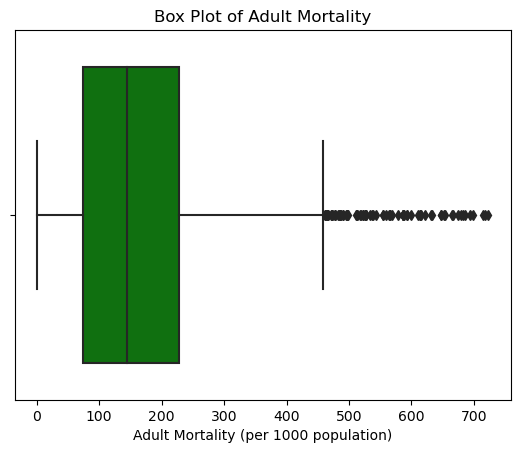

In [507]:
#plt.subplot(1, 2, 2)
sns.boxplot(x=df['Adult Mortality'], color='green')
plt.title('Box Plot of Adult Mortality')
plt.xlabel('Adult Mortality (per 1000 population)')


# Preprocessing Column: Infant deaths

### Outlier Treatment

In [508]:
from scipy.stats import zscore

# Initialize a list to store the outliers
outliers = []

# Handle outliers on a country-by-country basis using Z-score
threshold = 3 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['infant deaths'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'infant deaths']))

# Print all identified outliers
print("Identified Outliers:")
for country, idx, outlier in outliers:
    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['infant deaths'].mean()
    std_dev = country_data['infant deaths'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'infant deaths'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'infant deaths'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'infant deaths']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")


Identified Outliers:
Country: Bulgaria, Index: 384, Outlier: 0
Country: France, Index: 930, Outlier: 2
Country: Israel, Index: 1266, Outlier: 0

After Outliers treatment:
Country: Bulgaria, Index: 384, Original Outlier: 0, New Value: 0.1875
Country: France, Index: 930, Original Outlier: 2, New Value: 2.1875
Country: Israel, Index: 1266, Original Outlier: 0, New Value: 0.1875


# Preprocessing Column: Alcohol

In [539]:
#1- Fill missing values with the mean alcohol consumption for the same country.
#2- Verify the results.

data['Alcohol'] = data.groupby('Country')['Alcohol'].transform(lambda x: x.fillna(x.mean()))

# Verify the changes
missing_values_alcohol = data['Alcohol'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')
#print(data[['Country', 'Year', 'Alcohol']].head(20))

Missing values in Alcohol column after filling: 17


Some countries still have missing values in the 'Alcohol' column even after filling with the mean alcohol consumption for the same country. This might happen if a country has all missing values for the 'Alcohol' column, making it impossible to calculate the mean for that country.

To handle this, we will fill the remaining missing values with the global mean alcohol consumption.



In [540]:

# Fill remaining missing values with the global mean alcohol consumption
global_mean_alcohol = data['Alcohol'].mean()
data['Alcohol'] = data['Alcohol'].fillna(global_mean_alcohol)

# Verify the changes
missing_values_alcohol = data['Alcohol'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')

Missing values in Alcohol column after filling: 0


# Preprocessing Column: percentage expenditure

In [511]:
from scipy.stats import zscore

# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())

# Handle outliers on a country-by-country basis using Z-score
threshold = 3 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['percentage expenditure'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'percentage expenditure']))

# Print all identified outliers
print("Identified Outliers:")
for country, idx, outlier in outliers:
    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['percentage expenditure'].mean()
    std_dev = country_data['percentage expenditure'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'percentage expenditure'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'percentage expenditure'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'percentage expenditure']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")


Identified Outliers:
Country: Turkey, Index: 2685, Outlier: 1275.877569

After Outliers treatment:
Country: Turkey, Index: 2685, Original Outlier: 1275.877569, New Value: 1275.877569


In [512]:
Barbados_data = data[data['Country'] == 'Turkey']
print(Barbados_data)

     Country  Year      Status  Life expectancy  Adult Mortality  \
2681  Turkey  2015  Developing             75.8             16.0   
2682  Turkey  2014  Developing             75.5             17.0   
2683  Turkey  2013  Developing             75.2             19.0   
2684  Turkey  2012  Developing             74.8            112.0   
2685  Turkey  2011  Developing             74.5            114.0   
2686  Turkey  2010  Developing             74.2            116.0   
2687  Turkey  2009  Developing             73.9            118.0   
2688  Turkey  2008  Developing             73.5            121.0   
2689  Turkey  2007  Developing             73.2            124.0   
2690  Turkey  2006  Developing             72.8            126.0   
2691  Turkey  2005  Developing             72.4            129.0   
2692  Turkey  2004  Developing             72.0            132.0   
2693  Turkey  2003  Developing             71.6            135.0   
2694  Turkey  2002  Developing             71.2 

# Preprocessing Column: Diphtheria

### Missing value Treatment

In [521]:
# Fill missing values in 'Diphtheria' with the mean value of the same country
data['Diphtheria'] = data.groupby('Country')['Diphtheria'].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining missing values in 'Diphtheria' with the global mean
global_mean_diphtheria = data['Diphtheria'].mean()
data['Diphtheria'] = data['Diphtheria'].fillna(global_mean_diphtheria)

print("Remaining missing values:")
data['Diphtheria'].isnull().sum()

Remaining missing values:


0

### Outlier Treatment

In [514]:

# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Diphtheria'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Diphtheria']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Diphtheria'].mean()
    std_dev = country_data['Diphtheria'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Diphtheria'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Diphtheria'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Diphtheria']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")


After Outliers treatment:
Country: Antigua and Barbuda, Index: 79, Original Outlier: 95.0, New Value: 95.0
Country: Armenia, Index: 106, Original Outlier: 9.0, New Value: 24.219240167661667
Country: Australia, Index: 127, Original Outlier: 9.0, New Value: 24.560876400289473
Country: Belarus, Index: 236, Original Outlier: 5.0, New Value: 22.342940440933404
Country: Bulgaria, Index: 385, Original Outlier: 88.0, New Value: 88.0
Country: Burkina Faso, Index: 403, Original Outlier: 9.0, New Value: 9.876141112527435
Country: Burundi, Index: 431, Original Outlier: 8.0, New Value: 20.900944494156278
Country: Côte d'Ivoire, Index: 434, Original Outlier: 8.0, New Value: 14.776974707126413
Country: Central African Republic, Index: 526, Original Outlier: 4.0, New Value: 5.160664029118564
Country: Chile, Index: 547, Original Outlier: 9.0, New Value: 24.66374708928474
Country: Cuba, Index: 669, Original Outlier: 72.0, New Value: 72.99561613058654
Country: Denmark, Index: 742, Original Outlier: 9.0,

# Preprocessing Column: Hepatitis B

### Missing Value Treatment

In [537]:
# Prepare data for regression
# Separate rows with and without missing values in 'Hepatitis B'
from sklearn.linear_model import LinearRegression
data_with_hepatitis_b = data.dropna(subset=['Hepatitis B'])
data_without_hepatitis_b = data[data['Hepatitis B'].isnull()]

# Fit a regression model
X_train = data_with_hepatitis_b[['Diphtheria']].values  # Predictor
y_train = data_with_hepatitis_b['Hepatitis B'].values  # Target

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict missing values
X_test = data_without_hepatitis_b[['Diphtheria']].values
y_pred = regressor.predict(X_test)

# Fill the missing values in the original dataframe
data.loc[data['Hepatitis B'].isnull(), 'Hepatitis B'] = y_pred

# Verify the changes
missing_values_hepatitis_b = data['Hepatitis B'].isnull().sum()
print(f'Missing values in Hepatitis B column after filling: {missing_values_hepatitis_b}')
print(data[['Country', 'Year', 'Hepatitis B', 'Diphtheria']].head(20))

Missing values in Hepatitis B column after filling: 0
        Country  Year  Hepatitis B  Diphtheria
0   Afghanistan  2015         65.0        65.0
1   Afghanistan  2014         62.0        62.0
2   Afghanistan  2013         64.0        64.0
3   Afghanistan  2012         67.0        67.0
4   Afghanistan  2011         68.0        68.0
5   Afghanistan  2010         66.0        66.0
6   Afghanistan  2009         63.0        63.0
7   Afghanistan  2008         64.0        64.0
8   Afghanistan  2007         63.0        63.0
9   Afghanistan  2006         64.0        58.0
10  Afghanistan  2005         66.0        58.0
11  Afghanistan  2004         67.0         5.0
12  Afghanistan  2003         65.0        41.0
13  Afghanistan  2002         64.0        36.0
14  Afghanistan  2001         63.0        33.0
15  Afghanistan  2000         62.0        24.0
16      Albania  2015         99.0        99.0
17      Albania  2014         98.0        98.0
18      Albania  2013         99.0        99.0
19    

### Outlier Treatment

In [516]:
# Initialize a list to store the outliers
outliers = []
data = pd.read_csv("Life Expectancy Data 2.csv")
data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Hepatitis B'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Hepatitis B']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Hepatitis B'].mean()
    std_dev = country_data['Hepatitis B'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Hepatitis B'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Hepatitis B'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Hepatitis B']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:
Country: Argentina, Index: 87, Original Outlier: 9.0, New Value: 13.736464853162502
Country: Armenia, Index: 111, Original Outlier: 55.0, New Value: 55.0
Country: Barbados, Index: 222, Original Outlier: 18.0, New Value: 25.055529703257072
Country: Belarus, Index: 239, Original Outlier: 7.0, New Value: 16.212246476894293
Country: Belize, Index: 271, Original Outlier: 76.0, New Value: 79.31627070342363
Country: Bolivia (Plurinational State of), Index: 316, Original Outlier: 8.0, New Value: 19.123529428726115
Country: Botswana, Index: 348, Original Outlier: 9.0, New Value: 24.006398398337623
Country: Bulgaria, Index: 397, Original Outlier: 88.0, New Value: 88.20714691097909
Country: Cameroon, Index: 486, Original Outlier: 8.0, New Value: 8.0
Country: Comoros, Index: 604, Original Outlier: 28.0, New Value: 28.0
Country: Czechia, Index: 702, Original Outlier: 86.0, New Value: 86.0343407431904
Country: Democratic People's Republic of Korea, Index: 717, Original Out

# Preprocessing Column: Measles

### Outlier Treatment

In [517]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3.5 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Measles'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Measles']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Measles'].mean()
    std_dev = country_data['Measles'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Measles'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Measles'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Measles']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:
Country: Albania, Index: 31, Original Outlier: 662, New Value: 624.5393626546273
Country: Algeria, Index: 44, Original Outlier: 15374, New Value: 15374.0
Country: Argentina, Index: 85, Original Outlier: 17, New Value: 17.0
Country: Bahrain, Index: 177, Original Outlier: 46, New Value: 45.84411661839542
Country: Bangladesh, Index: 202, Original Outlier: 25934, New Value: 25934.0
Country: Belgium, Index: 244, Original Outlier: 576, New Value: 556.0536825225698
Country: Bolivia (Plurinational State of), Index: 319, Original Outlier: 122, New Value: 114.375
Country: Botswana, Index: 351, Original Outlier: 2672, New Value: 2628.7286890617124
Country: Brazil, Index: 353, Original Outlier: 876, New Value: 865.954800647971
Country: Bulgaria, Index: 389, Original Outlier: 22004, New Value: 20738.72051942277
Country: Burkina Faso, Index: 406, Original Outlier: 54118, New Value: 51539.73480361303
Country: Burundi, Index: 431, Original Outlier: 18363, New Value: 17264.49

# Preprocessing Column: BMI

### Missing Value treatment

In [518]:
# Identify countries with all BMI values missing
countries_with_all_missing_bmi = data.groupby('Country')['BMI'].apply(lambda x: x.isnull().all())
countries_with_all_missing_bmi = countries_with_all_missing_bmi[countries_with_all_missing_bmi].index.tolist()
print("Countries with all BMI values missing:", countries_with_all_missing_bmi)


# Calculate the overall median BMI
overall_median_bmi = data['BMI'].median()

# Fill missing BMI values for countries with all BMI values missing
for country in countries_with_all_missing_bmi:
    data.loc[data['Country'] == country, 'BMI'] = data.loc[data['Country'] == country, 'BMI'].fillna(overall_median_bmi)

# Verify the changes
missing_values_bmi = data['BMI'].isnull().sum()
print(f'Missing values in BMI column after filling with median and overall median: {missing_values_bmi}')



Countries with all BMI values missing: ['Monaco', 'San Marino', 'South Sudan', 'Sudan']
Missing values in BMI column after filling with median and overall median: 0


# Preprocessing Column: under-five deaths

### Outlier Treatmennt

In [519]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 4 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['under-five deaths'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'under-five deaths']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['under-five deaths'].mean()
    std_dev = country_data['under-five deaths'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'under-five deaths'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'under-five deaths'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'under-five deaths']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:


# Preprocessing Column: Polio

### Missing Value Treatment

In [522]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate the rows with and without missing Polio values
data_with_polio = data.dropna(subset=['Polio'])
data_without_polio = data[data['Polio'].isnull()]

# Prepare the training and testing data
X_train = data_with_polio[['Diphtheria']].values
y_train = data_with_polio['Polio'].values
X_test = data_without_polio[['Diphtheria']].values

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict missing values
y_pred = regressor.predict(X_test)

# Ensure the lengths match
print(f'Length of y_pred: {len(y_pred)}')
print(f'Number of missing values in Polio column: {data_without_polio.shape[0]}')

# Fill the missing values in the original dataframe
data.loc[data['Polio'].isnull(), 'Polio'] = y_pred

# Verify the changes
missing_values_polio = data['Polio'].isnull().sum()
print(f'Missing values in Polio column after filling: {missing_values_polio}')


Length of y_pred: 19
Number of missing values in Polio column: 19
Missing values in Polio column after filling: 0


### Outlier Treatment

In [523]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3.5 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Polio'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Polio']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Polio'].mean()
    std_dev = country_data['Polio'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Polio'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Polio'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Polio']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:
Country: Armenia, Index: 104, Original Outlier: 9.0, New Value: 13.788228323303713
Country: Australia, Index: 127, Original Outlier: 9.0, New Value: 14.16682931514589
Country: Bangladesh, Index: 204, Original Outlier: 9.0, New Value: 12.151034070355905
Country: Bhutan, Index: 299, Original Outlier: 9.0, New Value: 13.605860503764461
Country: Bolivia (Plurinational State of), Index: 309, Original Outlier: 9.0, New Value: 9.0
Country: Canada, Index: 504, Original Outlier: 9.0, New Value: 13.24627611529796
Country: Colombia, Index: 577, Original Outlier: 9.0, New Value: 12.675213936750055
Country: Democratic People's Republic of Korea, Index: 720, Original Outlier: 93.0, New Value: 93.0
Country: Denmark, Index: 742, Original Outlier: 9.0, New Value: 13.424534865681196
Country: Dominican Republic, Index: 771, Original Outlier: 9.0, New Value: 9.0
Country: Eritrea, Index: 855, Original Outlier: 9.0, New Value: 13.158025083890664
Country: Georgia, Index: 985, Origi

# Preprocessing Column: Total expenditure

### Missing value Treatment:

In [542]:
data['Total expenditure'] = data.groupby('Country')['Total expenditure'].transform(lambda x: x.fillna(x.mean()))

# Verify the changes
missing_values_alcohol = data['Total expenditure'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')

Missing values in Alcohol column after filling: 0


In [543]:

# Fill remaining missing values with the global mean alcohol consumption
global_mean_alcohol = data['Total expenditure'].mean()
data['Total expenditure'] = data['Total expenditure'].fillna(global_mean_alcohol)

# Verify the changes
missing_values_alcohol = data['Total expenditure'].isnull().sum()
print(f'Missing values in Alcohol column after filling: {missing_values_alcohol}')

Missing values in Alcohol column after filling: 0


### Outlier Treatment:

In [ ]:
# Initialize a list to store the outliers
outliers = []
data = pd.read_csv("Life Expectancy Data 2.csv")
data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Total expenditure'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Total expenditure']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Total expenditure'].mean()
    std_dev = country_data['Total expenditure'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Total expenditure'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Total expenditure'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Total expenditure']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")


# Preprocessing Column: HIV/AIDS

### Outlier Treatment

In [525]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['HIV/AIDS'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'HIV/AIDS']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['HIV/AIDS'].mean()
    std_dev = country_data['HIV/AIDS'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'HIV/AIDS'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'HIV/AIDS'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'HIV/AIDS']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:
Country: Guatemala, Index: 1073, Original Outlier: 0.2, New Value: 0.20179491924311224
Country: Mauritius, Index: 1672, Original Outlier: 0.2, New Value: 0.18125000000000005
Country: Trinidad and Tobago, Index: 2662, Original Outlier: 2.0, New Value: 2.0


# Preprocessing Column: GDP

### Missing Value Treatment

In [526]:
from sklearn.linear_model import LinearRegression

# Separate the data into rows with and without missing GDP values
data_with_gdp = data.dropna(subset=['GDP'])
data_without_gdp = data[data['GDP'].isnull()]

# Define the features (percentage expenditure) and target (GDP) for the regression model
X_train = data_with_gdp[['percentage expenditure']].values
y_train = data_with_gdp['GDP'].values

# Initialize and train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the missing GDP values
X_test = data_without_gdp[['percentage expenditure']].values
y_pred = regressor.predict(X_test)

# Fill the missing values in the original dataframe
data.loc[data['GDP'].isnull(), 'GDP'] = y_pred

# Verify the changes
missing_values_gdp = data['GDP'].isnull().sum()
print(f'Missing values in GDP column after filling: {missing_values_gdp}')


Missing values in GDP column after filling: 0


### Outlier Treatment

In [ ]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 2.5 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['GDP'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'GDP']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['GDP'].mean()
    std_dev = country_data['GDP'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'GDP'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'GDP'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'GDP']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")


# Preprocessing Column: Population

### Missing Value Treatment

In [527]:
# Fill missing values using linear interpolation within each country group
data['Population'] = data.groupby('Country')['Population'].apply(lambda group: group.interpolate(method='linear'))

# Fill any remaining missing values using forward fill and backward fill within each country group
data['Population'] = data.groupby('Country')['Population'].apply(lambda group: group.ffill().bfill())

# Fill any remaining missing values with the global median population
global_median_population = data['Population'].median()
data['Population'] = data['Population'].fillna(global_median_population)

# Verify the changes
missing_values_population = data['Population'].isnull().sum()
print(f'Missing values in Population column after filling: {missing_values_population}')


Missing values in Population column after filling: 0


/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_70415/57887790.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['Population'] = data.groupby('Country')['Population'].apply(lambda group: group.interpolate(method='linear'))
/var/folders/f9/vf13tj_93t78jv86r47nbqfr0000gn/T/ipykernel_70415/57887790.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior

### Outlier Treatment

In [528]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 2.5 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Population'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Population']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Population'].mean()
    std_dev = country_data['Population'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Population'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Population'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Population']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:
Country: Chile, Index: 547, Original Outlier: 1739746.0, New Value: 1847057.1760055926
Country: Chile, Index: 554, Original Outlier: 1614764.0, New Value: 1847057.1760055926
Country: Greece, Index: 1031, Original Outlier: 11121341.0, New Value: 8256509.821853745
Country: Hungary, Index: 1155, Original Outlier: 9866468.0, New Value: 9801753.67707402
Country: Hungary, Index: 1158, Original Outlier: 9971727.0, New Value: 9801753.67707402
Country: Maldives, Index: 1602, Original Outlier: 49163.0, New Value: 33888.35510471547
Country: Slovenia, Index: 2357, Original Outlier: 1995733.0, New Value: 1972734.022630226
Country: Slovenia, Index: 2360, Original Outlier: 1988925.0, New Value: 1972734.022630226


# Preprocessing Column: Thinness 5-9 Years

### Missing Value Treatment:

In [529]:
# Identify countries with all Total expenditure values missing
countries_with_all_missing_thinnessyears = data.groupby('Country')['thinness 5-9 years'].apply(lambda x: x.isnull().all())
countries_with_all_missing_thinnessyears = countries_with_all_missing_thinnessyears[countries_with_all_missing_thinnessyears].index.tolist()
print("Countries with all thinness 5-9 years values missing:", countries_with_all_missing_thinnessyears)


# Calculate the overall median Total expenditure
overall_median_thinnessyears = data['thinness 5-9 years'].median()

# Fill missing Total expenditure values for countries with all Total expenditure values missing
for country in countries_with_all_missing_thinnessyears:
    data.loc[data['Country'] == country, 'thinness 5-9 years'] = data.loc[data['Country'] == country, 'thinness 5-9 years'].fillna(overall_median_thinnessyears)
# Fill remaining missing values in 'Thinness 5-9 years' with the global median
data['thinness 5-9 years'] = data['thinness 5-9 years'].fillna(overall_median_thinnessyears)

# Verify the changes
missing_values_thinnessyears = data['thinness 5-9 years'].isnull().sum()
print(f'Missing values in thinness 5-9 years column after filling with overall median: {missing_values_thinnessyears}')

#overall_median_thinness_5_9 = data[' thinness 5-9 years'].median()



Countries with all thinness 5-9 years values missing: ['Monaco', 'San Marino', 'South Sudan', 'Sudan']
Missing values in thinness 5-9 years column after filling with overall median: 0


# Preprocessing Column: Thinness 1-19 Years

### Missing Value Treatment

In [530]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate the data into rows with and without missing 'Thinness 1-19 years' values
data_with_thinness = data.dropna(subset=['thinness  1-19 years'])
data_without_thinness = data[data['thinness  1-19 years'].isnull()]

# Define the features (Thinness 5-9 years) and target (Thinness 1-19 years) for the regression model
X_train = data_with_thinness[['thinness 5-9 years']].values
y_train = data_with_thinness['thinness  1-19 years'].values

# Initialize and train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the missing 'Thinness 1-19 years' values
X_test = data_without_thinness[['thinness 5-9 years']].values
y_pred = regressor.predict(X_test)

# Fill the missing values in the original dataframe
data.loc[data['thinness  1-19 years'].isnull(), 'thinness  1-19 years'] = y_pred

# Verify the changes
missing_values_thinness = data['thinness  1-19 years'].isnull().sum()
print(f'Missing values in Thinness 1-19 years column after filling: {missing_values_thinness}')


Missing values in Thinness 1-19 years column after filling: 0


### Outlier Treatment

In [531]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 4 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['thinness  1-19 years'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'thinness  1-19 years']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['thinness  1-19 years'].mean()
    std_dev = country_data['thinness  1-19 years'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'thinness  1-19 years'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'thinness  1-19 years'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'thinness  1-19 years']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:


# Preprocessing Column: Schooling

### Missing Values Handling:

In [532]:
# Fill missing values in 'Schooling' using the median for each country
data['Schooling'] = data.groupby('Country')['Schooling'].transform(lambda x: x.fillna(x.median()))
missing_values = data['Schooling'].isnull().sum()

# Fill remaining missing values in 'Schooling' with the global median
global_median_schooling = data['Schooling'].median()
data['Schooling'] = data['Schooling'].fillna(global_median_schooling)

# Verify the changes
missing_values_schooling = data['Schooling'].isnull().sum()
print(f'Missing values in Schooling column after filling with global median: {missing_values_schooling}')


Missing values in Schooling column after filling with global median: 0


### Outlier Handling

In [533]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3.5 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Schooling'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Schooling']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Schooling'].mean()
    std_dev = country_data['Schooling'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Schooling'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Schooling'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Schooling']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:
Country: Bosnia and Herzegovina, Index: 335, Original Outlier: 0.0, New Value: 0.45299224147950845
Country: Canada, Index: 496, Original Outlier: 16.3, New Value: 16.3
Country: Equatorial Guinea, Index: 849, Original Outlier: 0.0, New Value: 0.4307088137481685
Country: Micronesia (Federated States of), Index: 1714, Original Outlier: 0.0, New Value: 0.4881384190455922
Country: Timor-Leste, Index: 2616, Original Outlier: 0.0, New Value: 0.019550571254033144
Country: Turkmenistan, Index: 2712, Original Outlier: 0.0, New Value: 0.6288731557638698


# Preprocessing Column: Income Composition of Resources

### Missing Value Treatment

In [534]:
from sklearn.linear_model import LinearRegression

# Separate the data into rows with and without missing 'Income composition of resources' values
data_with_income = data.dropna(subset=['Income composition of resources'])
data_without_income = data[data['Income composition of resources'].isnull()]

# Define the features (Schooling) and target (Income composition of resources) for the regression model
X_train = data_with_income[['Schooling']].values
y_train = data_with_income['Income composition of resources'].values

# Initialize and train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the missing 'Income composition of resources' values
X_test = data_without_income[['Schooling']].values
y_pred = regressor.predict(X_test)

# Fill the missing values in the original dataframe
data.loc[data['Income composition of resources'].isnull(), 'Income composition of resources'] = y_pred

# Verify the changes
missing_values_income = data['Income composition of resources'].isnull().sum()
print(f'Missing values in Income composition of resources column after filling: {missing_values_income}')


Missing values in Income composition of resources column after filling: 0


### Outlier Treatment

In [535]:
# Initialize a list to store the outliers
outliers = []
#data = pd.read_csv("Life Expectancy Data 2.csv")
#data = data.rename(columns=lambda x: x.strip())
# Handle outliers on a country-by-country basis using Z-score
threshold = 3 # Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    
    # Calculate Z-scores
    z_scores = zscore(country_data['Income composition of resources'].dropna())
    
    # Identify outliers within each country and print them
    for idx, z in zip(country_data.index, z_scores):
        if abs(z) > threshold:
            outliers.append((country, idx, country_data.at[idx, 'Income composition of resources']))

# Print all identified outliers
#print("Identified Outliers:")
#for country, idx, outlier in outliers:
#    print(f"Country: {country}, Index: {idx}, Outlier: {outlier}")

# Cap the outliers to the Z-score threshold
for country in data['Country'].unique():
    country_data = data[data['Country'] == country]
    mean = country_data['Income composition of resources'].mean()
    std_dev = country_data['Income composition of resources'].std()
    
    for country, idx, value in outliers:
        if country == country_data['Country'].iloc[0]:
            if (value - mean) / std_dev > threshold:
                data.at[idx, 'Income composition of resources'] = mean + threshold * std_dev
            elif (value - mean) / std_dev < -threshold:
                data.at[idx, 'Income composition of resources'] = mean - threshold * std_dev

# Verify the changes
print("\nAfter Outliers treatment:")
for country, idx, outlier in outliers:
    new_value = data.at[idx, 'Income composition of resources']
    print(f"Country: {country}, Index: {idx}, Original Outlier: {outlier}, New Value: {new_value}")



After Outliers treatment:
Country: Bahamas, Index: 175, Original Outlier: 0.0, New Value: 0.14748804195977105
Country: Cabo Verde, Index: 463, Original Outlier: 0.0, New Value: 0.10566951424658755
Country: Chad, Index: 543, Original Outlier: 0.0, New Value: 0.03864973131589561
Country: Equatorial Guinea, Index: 849, Original Outlier: 0.0, New Value: 0.10339486778452439
Country: Ethiopia, Index: 897, Original Outlier: 0.0, New Value: 0.027363882546819984
Country: Georgia, Index: 993, Original Outlier: 0.0, New Value: 0.128262539227727
Country: Madagascar, Index: 1569, Original Outlier: 0.0, New Value: 0.0865960754843812
Country: Micronesia (Federated States of), Index: 1714, Original Outlier: 0.0, New Value: 0.1160103520652227
Country: Oman, Index: 1941, Original Outlier: 0.0, New Value: 0.13495129403296402
Country: Saint Lucia, Index: 2183, Original Outlier: 0.0, New Value: 0.12944653466468192
Country: Saint Vincent and the Grenadines, Index: 2199, Original Outlier: 0.0, New Value: 0.

# Saving preprocessing to another csv

In [551]:
data.to_csv("preprocessed_life_expectancy_data.csv", index=False)